In [1]:
import pandas_datareader.data as web
import datetime


start = datetime.datetime(2010, 1, 12)
end = datetime.datetime(2021, 1, 27)

SP500 = web.DataReader(['sp500'], 'fred', start, end)
SP500


,sp500
DATE,
2011-01-27,1299.54
2011-01-28,1276.34
2011-01-31,1286.12
2011-02-01,1307.59
2011-02-02,1304.03
...,...
2021-01-20,3851.85
2021-01-21,3853.07
2021-01-22,3841.47


In [2]:
import requests

#BTCUSD contains a dictionary
demo = 'bc9e7aacc595f1ec44ac3d9a653b66a8'
BTCUSD = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/crypto/BTCUSD?apikey={demo}')

BTCUSD = BTCUSD.json()
BTCUSD = BTCUSD['historical']

In [3]:
#BTCUSD

In [4]:
import pandas as pd

BTC = pd.DataFrame.from_dict(BTCUSD)
BTC.set_index('date',inplace=True)
#Keep only the close column
BTC = BTC[['close']]
#Rename the column name to BTC
BTC.columns = ['BTC']
BTC

,BTC
date,
2021-01-27,31924.662109
2021-01-26,32063.058594
2021-01-25,33424.339844
2021-01-24,32859.300781
2021-01-23,32606.126953
...,...
2016-01-31,368.766998
2016-01-30,378.255005
2016-01-29,379.473999


In [5]:
dates_str_list = BTC.index
dates_list = [pd.Timestamp(date_str) for date_str in dates_str_list]

# BTC.join(SP500, how="inner")
# SP500["2016-01":"2016-02"]
df = pd.concat([BTC, SP500], axis="columns", join="inner")
df


,BTC,sp500
2021-01-26,32063.058594,3849.62
2021-01-25,33424.339844,3855.36
2021-01-22,30926.146484,3841.47
2021-01-21,34299.191406,3853.07
2021-01-20,35294.812500,3851.85
...,...,...
2016-02-02,374.447998,1903.03
2016-02-01,373.056000,1939.38
2016-01-29,379.473999,1940.24
2016-01-28,380.289001,1893.36


In [6]:
SP500BTC = BTC.merge(SP500, how='inner',right_index = True, left_index=True)

#Drop NA since we have nan values for weekends. S&P500 only trades business days
SP500BTC.dropna(inplace=True)

print(SP500BTC)

                     BTC    sp500
2021-01-26  32063.058594  3849.62
2021-01-25  33424.339844  3855.36
2021-01-22  30926.146484  3841.47
2021-01-21  34299.191406  3853.07
2021-01-20  35294.812500  3851.85
...                  ...      ...
2016-02-02    374.447998  1903.03
2016-02-01    373.056000  1939.38
2016-01-29    379.473999  1940.24
2016-01-28    380.289001  1893.36
2016-01-27    394.971985  1882.95

[1259 rows x 2 columns]


In [7]:
correlation = SP500BTC.corr()
print(correlation)

            BTC     sp500
BTC    1.000000  0.829514
sp500  0.829514  1.000000


By looking into our results, we see that we have a strong and positive correlation of 0.82 between the price of Bitcoin and S&P 500

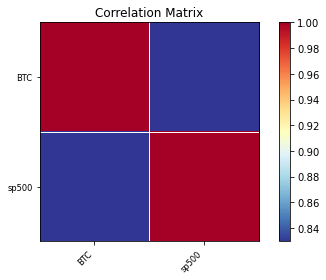

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

Correlation Matrix Bitcoin and S&P 500

The red colour of the graph means that the relationship is strong and positive